In [13]:
import numpy as np
from PIL import Image
img1 = np.array(Image.open("palmleaf2.png"))
F = np.bincount(img1.flatten())
print(len(F))
print(F[0])
t = 5
print(len(F[t+1:len(F)]))

126
1490
120


In [8]:
import numpy as np
from PIL import Image

img1 = np.array(Image.open("palmleaf1.png"))
F = np.bincount(img1.flatten())

# Create an array of intensity values
intensity_values = np.arange(len(F))

# Zip intensity values with counts to get pairs of intensity and count
intensity_count_pairs = list(zip(intensity_values, F))

print("Intensity - Count:")
for intensity, count in intensity_count_pairs:
    print(f"{intensity}: {count}")


Intensity - Count:
0: 6
1: 22
2: 43
3: 37
4: 71
5: 114
6: 96
7: 112
8: 95
9: 109
10: 106
11: 80
12: 99
13: 103
14: 71
15: 112
16: 101
17: 90
18: 90
19: 94
20: 86
21: 93
22: 87
23: 82
24: 97
25: 75
26: 85
27: 88
28: 85
29: 84
30: 76
31: 95
32: 76
33: 80
34: 82
35: 108
36: 93
37: 82
38: 71
39: 79
40: 72
41: 69
42: 75
43: 63
44: 61
45: 62
46: 69
47: 75
48: 75
49: 66
50: 68
51: 71
52: 78
53: 63
54: 61
55: 49
56: 57
57: 65
58: 66
59: 64
60: 61
61: 54
62: 48
63: 55
64: 57
65: 56
66: 64
67: 70
68: 68
69: 68
70: 60
71: 56
72: 46
73: 65
74: 51
75: 67
76: 54
77: 54
78: 68
79: 60
80: 73
81: 47
82: 66
83: 44
84: 62
85: 67
86: 46
87: 62
88: 73
89: 59
90: 67
91: 59
92: 58
93: 53
94: 66
95: 69
96: 69
97: 68
98: 74
99: 82
100: 69
101: 84
102: 74
103: 75
104: 84
105: 96
106: 71
107: 103
108: 85
109: 91
110: 106
111: 103
112: 95
113: 121
114: 119
115: 108
116: 127
117: 117
118: 127
119: 121
120: 155
121: 142
122: 145
123: 140
124: 151
125: 137
126: 139
127: 185
128: 194
129: 179
130: 173
131: 190
132: 2

<class 'tuple'>
-----------------------
threshold =  0
542.7726798542609
-----------------------
threshold =  1
541.0703473330864
-----------------------
threshold =  2
539.772089860806
-----------------------
threshold =  3
538.3575713557489
-----------------------
threshold =  4
537.6092345709285
-----------------------
threshold =  5
537.6999055410502
-----------------------
threshold =  6
537.455426907373
-----------------------
threshold =  7
537.5349477466362
-----------------------
threshold =  8
537.2963348290644
-----------------------
threshold =  9
537.3100398302536
-----------------------
threshold =  10
537.313229685188
-----------------------
threshold =  11
536.77815299982
-----------------------
threshold =  12
536.5399407213215
-----------------------
threshold =  13
536.5527189160027
-----------------------
threshold =  14
535.8756896225813
-----------------------
threshold =  15
535.7970655082814
-----------------------
threshold =  16
536.0033050532685
-------------

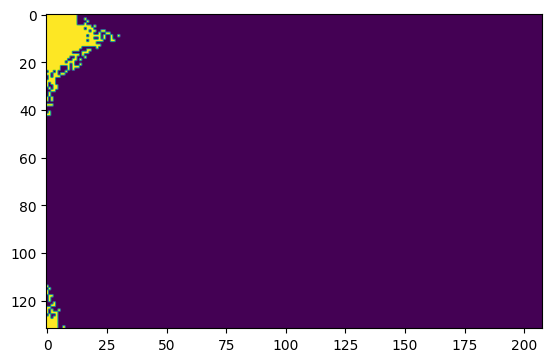

In [15]:
# OTSU
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
#  u of N1 samples:
# F(i) is intensity 

def find_best_b(input_image):
    var_b_values = []
    threshold_range = range(np.max(input_image)+1)
    F = np.bincount(input_image.flatten())
    N = len(F)
    min_var_w = float('inf')
    best_threshold = 0
    max_var_b = 0
    # u_t = np.mean(input_image)

        

    for t in threshold_range:
        print('-----------------------')
        print('threshold = ' , t)
        N1 = len(F[:t])
        N2 = len(F[t+1:N])

        u_t = np.mean(input_image)
        var_t = np.sum(((t - u_t) ** 2) * F[t]) / N
        var_1 = 0 
        var_2 = 0
        u_1 = 0
        u_2 = 0

        for i in range(t):
            u_1 = np.sum(i * F[i]) / np.sum(F[:t])
            var_1 = np.sum(((i - u_1) ** 2) * F[i]) / np.sum(F[:t])
        for j in range(t+1,np.max(input_image)+1):
            u_2 = np.sum(j * F[j]) / np.sum(F[t+1:])
            var_2 = np.sum(((j - u_2) ** 2) * F[j]) / np.sum(F[t+1:])

        var_w = (var_1 * N1 + var_2 * N2) / (N)
        print(var_w)
        # var_b = ((((u_1 - u_t)**2)*N1)/N) + ((((u_2 - u_t)**2)*N2)/N)
        # total mean and var 
        # if var_b > max:
        #     min_var_w = var_w
        #     best_threshold_1 = t 


        if var_w < min_var_w:
            min_var_w = var_w
            best_threshold = t 
        

    return best_threshold 

# thresholded image
def thresh_img(input):
    thresholded_img = np.zeros(input.shape)
    threshold = find_best_b(input)
    m,n = input.shape[:2]
    print(m,n)
    for i in range(m):
        for j in range(n):
            if input[i,j] < threshold:
                thresholded_img[i,j] = 0
            else :
                thresholded_img[i,j] = 255
    return thresholded_img

if __name__ == '__main__':
    img1 = np.array(Image.open("palmleaf1.png").convert("L"))
    max = np.max(img1)
    print(type(img1.flatten().shape))

    img2 = np.array(Image.open("palmleaf2.png"))

    varss_1= thresh_img(img1)
    plt.imshow(varss_1)    
    # plt.show()

    # find t such that it maximizes between class threshold 




/tmp/ipykernel_15999/2078239942.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  u_1 = np.sum(i * F[i] for i in range(t)) / N1
/tmp/ipykernel_15999/2078239942.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  u_2 = np.sum(j * F[j] for j in range(t, len(F))) / N2


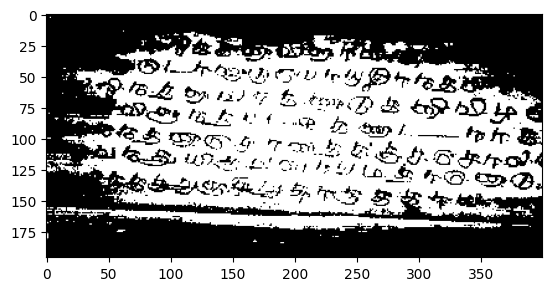

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def find_best_b(input_image):
    var_b_values = []
    threshold_range = range(np.max(input_image) + 1)
    F = np.bincount(input_image.flatten())
    N = len(F)
    best_threshold = 0
    max_var_b = 0

    for t in threshold_range:
        N1 = np.sum(F[:t])
        N2 = np.sum(F[t:])
        if N1 == 0 or N2 == 0:
            continue

        u_t = np.mean(input_image)
        u_1 = np.sum(i * F[i] for i in range(t)) / N1
        u_2 = np.sum(j * F[j] for j in range(t, len(F))) / N2

        var_b = (N1 * N2 * ((u_1 - u_2) ** 2)) / (N ** 2)
        if var_b > max_var_b:
            max_var_b = var_b
            best_threshold = t

    return best_threshold

def thresh_img(input_image):
    threshold = find_best_b(input_image)
    thresholded_img = np.zeros_like(input_image)
    thresholded_img[input_image >= threshold] = 255
    return thresholded_img

if __name__ == '__main__':
    img1 = np.array(Image.open("palmleaf2.png").convert("L"))
    thresholded_img = thresh_img(img1)
    plt.imshow(thresholded_img, cmap='gray')
    plt.show()


/tmp/ipykernel_15999/1613868058.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  u_1 = np.sum(i * F[i] for i in range(t)) / N1
/tmp/ipykernel_15999/1613868058.py:21: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  u_2 = np.sum(j * F[j] for j in range(t, len(F))) / N2
/tmp/ipykernel_15999/1613868058.py:23: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  var_w = (N1 * np.sum((i - u_1) ** 2 * F[i] for i in range(t)) + N2 * np.sum((j - u_2) ** 2 * F[j] for j in range(t, len(F)))) / N


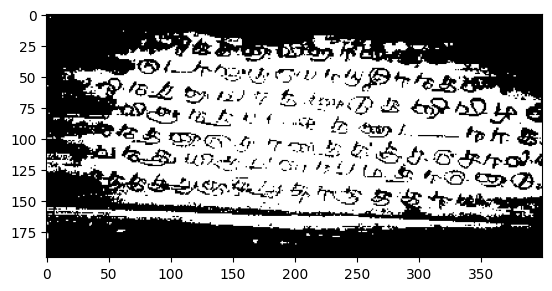

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def find_best_b(input_image):
    var_b_values = []
    threshold_range = range(np.max(input_image) + 1)
    F = np.bincount(input_image.flatten())
    N = len(F)
    min_var_w = float('inf')
    best_threshold = 0

    for t in threshold_range:
        N1 = np.sum(F[:t])
        N2 = np.sum(F[t:])
        if N1 == 0 or N2 == 0:
            continue

        u_t = np.mean(input_image)
        u_1 = np.sum(i * F[i] for i in range(t)) / N1
        u_2 = np.sum(j * F[j] for j in range(t, len(F))) / N2

        var_w = (N1 * np.sum((i - u_1) ** 2 * F[i] for i in range(t)) + N2 * np.sum((j - u_2) ** 2 * F[j] for j in range(t, len(F)))) / N

        if var_w < min_var_w:
            min_var_w = var_w
            best_threshold = t

    return best_threshold

def thresh_img(input_image):
    threshold = find_best_b(input_image)
    thresholded_img = np.zeros_like(input_image)
    thresholded_img[input_image >= threshold] = 255
    return thresholded_img

if __name__ == '__main__':
    img1 = np.array(Image.open("palmleaf2.png").convert("L"))
    thresholded_img = thresh_img(img1)
    plt.imshow(thresholded_img, cmap='gray')
    plt.show()


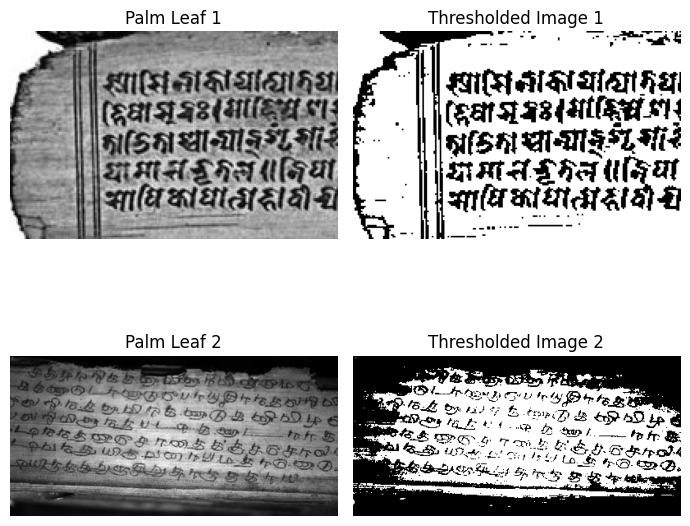

In [29]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def find_best_b(input_image):
    var_b_values = []
    threshold_range = range(np.max(input_image) + 1)
    F = np.bincount(input_image.flatten())
    N = len(F)
    min_var_w = float('inf')
    best_threshold = 0

    for t in threshold_range:
        N1 = np.sum(F[:t])
        N2 = np.sum(F[t:])
        if N1 == 0 or N2 == 0:
            continue

        u_1 = sum(i * F[i] for i in range(t)) / N1
        u_2 = sum(j * F[j] for j in range(t, len(F))) / N2

        var_1 = sum(((i - u_1) ** 2) * F[i] for i in range(t)) / N1
        var_2 = sum(((j - u_2) ** 2) * F[j] for j in range(t, len(F))) / N2

        var_w = (N1 * var_1 + N2 * var_2) / N

        if var_w < min_var_w:
            min_var_w = var_w
            best_threshold = t

    return best_threshold

def thresh_img(input_image):
    threshold = find_best_b(input_image)
    thresholded_img = np.zeros_like(input_image)
    thresholded_img[input_image >= threshold] = 255
    return thresholded_img

if __name__ == '__main__':
    img1 = np.array(Image.open("palmleaf1.png").convert("L"))
    img2 = np.array(Image.open("palmleaf2.png").convert("L"))

    thresholded_img1 = thresh_img(img1)
    thresholded_img2 = thresh_img(img2)

    fig, axes = plt.subplots(2, 2, figsize=(7,7))

    axes[0,0].imshow(img1, cmap='gray')
    axes[0,0].set_title('Palm Leaf 1')

    axes[0,1].imshow(thresholded_img1, cmap='gray')
    axes[0,1].set_title('Thresholded Image 1')

    axes[1,0].imshow(img2, cmap='gray')
    axes[1,0].set_title('Palm Leaf 2')

    axes[1,1].imshow(thresholded_img2, cmap='gray')
    axes[1,1].set_title('Thresholded Image 2')

    for ax in axes.flat:
        ax.axis('off')

    plt.tight_layout()
    plt.show()